In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
#This can be done using Base.classes.keys()
#Inspect data base tables

inspector = inspect(engine)
tables=inspector.get_table_names()
tables

['measurement', 'station']

In [9]:
#Inspect Columns in measurement table
columns=inspector.get_columns('measurement')

for each_column in columns:
    print(f" {each_column['name']} - {each_column['type']}")

 id - INTEGER
 station - TEXT
 date - TEXT
 prcp - FLOAT
 tobs - FLOAT


In [10]:
#Inspect Columns in station table
columns=inspector.get_columns('station')

for each_column in columns:
    print(f" {each_column['name']} - {each_column['type']}")

 id - INTEGER
 station - TEXT
 name - TEXT
 latitude - FLOAT
 longitude - FLOAT
 elevation - FLOAT


In [11]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

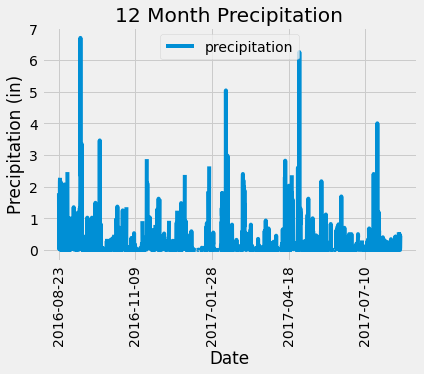

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Find the most recent date
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# latest_date
#2017-08-23

# Calculate the date 1 year ago from the last data point in the database
#Come back and potentially fix the date reference for the latest date
year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
# year_ago=(dt.date.fromisoformat(str(latest_date)))-dt.timedelta(days=365)
year_ago
#2016, 8, 23

# Perform a query to retrieve the data and precipitation scores
sel=[Measurement.date,Measurement.prcp]
results=session.query(*sel).filter(Measurement.date>=year_ago).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column
#The date is not a unique identifier and should not be set to the index in this instance, why are we doing that??
df_0=pd.DataFrame(results)
# df=df_0.sort_values(by='date',ascending=True)

df_1=df_0.set_index('date')

# Sort the dataframe by date

# df=df_0.sort_values(by='date',ascending=True)
df_2=df_1.sort_index()

df=df_2.rename(columns={'prcp':'precipitation'})
# df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(y='precipitation')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title('12 Month Precipitation')
# plt.legend('in',loc='best')
plt.savefig('precipitation_over_time.png',dpi=400,bbox_inches='tight')


In [33]:
# # type(str(latest_date))
# date=dt.date.isoformat(str(latest_date))

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [110]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(func.count(Station.station)).all()
station_count

[(9)]

In [123]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity=session.query(Measurement.station,func.count(Measurement.date))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.date).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station=station_activity[0][0]
most_active_station

sel=[func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

results=session.query(*sel).filter(Measurement.station==most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

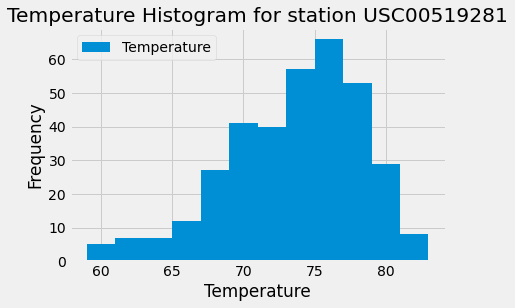

In [145]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[Measurement.station,Measurement.date,Measurement.tobs]
results=session.query(*sel).filter(Measurement.date>=year_ago).filter(Measurement.station==most_active_station).all()
results

df_0=pd.DataFrame(results)

column_names={'station':'Station',
              'date':'Date',
              'tobs':'Temperature'
             }

df_1=df_0.rename(columns=column_names)

# df_1

df_1.plot(kind='hist',bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Histogram for station {most_active_station}')
plt.savefig('temperature_histogram.png',dpi=400,bbox_inches='tight')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
